# Noise Temperature

This notebook demonstrates some of the noise utilities in the ``RF-Tools`` package.  

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

import rftools.noise as noise

# Calculate noise from the Y-factor technique

The Y-factor is the ratio of the output powers resulting from the hot and cold loads:

$$Y = \frac{T_{1}}{T_{2}}$$

The noise temperature is then calculated by:

$$T_n = \frac{T_{hot} - Y\cdot T_{cold}}{Y-1}$$

See section 10.1 in "Microwave Engineering", Pozar.

In [2]:
thot  = 293  # K --> room temperature
tcold = 78   # K --> liquid nitrogen

# Maximum possible Y-factor
ymax = thot / tcold

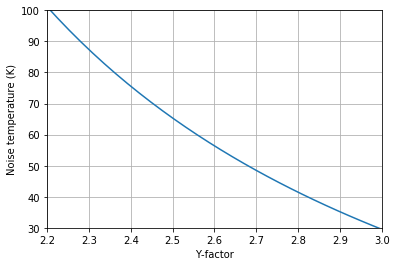

In [3]:
yfac = np.linspace(1+1e-5, ymax, 100)

plt.plot(yfac, noise.calculate_tn(yfac, thot, tcold))
plt.xlabel('Y-factor')
plt.ylabel('Noise temperature (K)')
plt.ylim([30, 100])
plt.xlim([2.2, 3])
plt.grid();

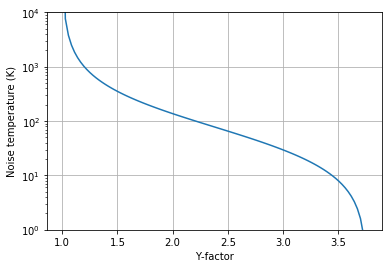

In [4]:
plt.semilogy(yfac, noise.calculate_tn(yfac, thot, tcold))
plt.xlabel('Y-factor')
plt.ylabel('Noise temperature (K)')
# plt.ylim([0, 1000])
plt.ylim([1e0, 1e4])
plt.grid();

# Callen-Welton temperature

We often assume that blackbody loads can be described by the Rayleigh-Jeans approximation. However, for high frequencies and low temperatures, this assumption does not always hold. Instead, we have to use the Callen-Welton equation to calculate the equivalent RJ temperature of a load.

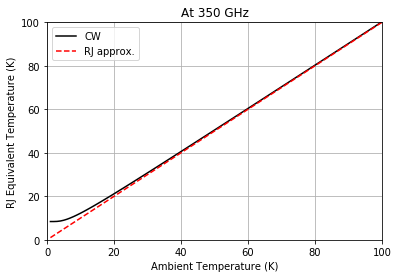

In [5]:
freq = 350e9

temp = np.linspace(1, 100, 101)

plt.plot(temp, noise.temp_cw(freq, temp), 'k', label='CW')
plt.plot(temp, temp, 'r--', label='RJ approx.')
plt.xlabel('Ambient Temperature (K)')
plt.ylabel('RJ Equivalent Temperature (K)')
plt.title('At 350 GHz')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.legend()
plt.grid();

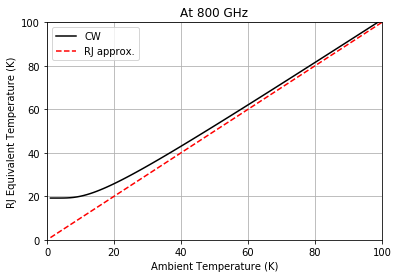

In [6]:
freq = 800e9

temp = np.linspace(1, 100, 101)

plt.plot(temp, noise.temp_cw(freq, temp), 'k', label='CW')
plt.plot(temp, temp, 'r--', label='RJ approx.')
plt.xlabel('Ambient Temperature (K)')
plt.ylabel('RJ Equivalent Temperature (K)')
plt.title('At 800 GHz')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.legend()
plt.grid();

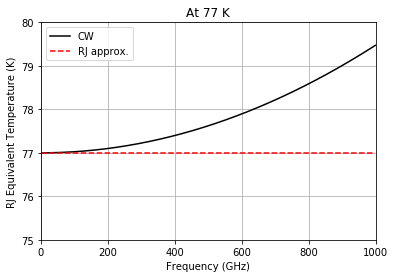

In [7]:
freq = np.arange(1, 1000) * 1e9

temp = 77

plt.plot(freq / 1e9, noise.temp_cw(freq, temp), 'k', label='CW')
plt.plot(freq / 1e9, temp*np.ones_like(freq), 'r--', label='RJ approx.')
plt.xlabel('Frequency (GHz)')
plt.ylabel('RJ Equivalent Temperature (K)')
plt.title('At 77 K')
plt.xlim([0, 1000])
plt.ylim([75, 80])
plt.legend()
plt.grid();

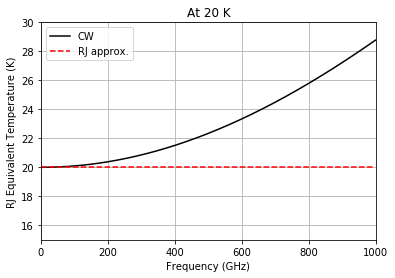

In [8]:
freq = np.arange(1, 1000) * 1e9

temp = 20

plt.plot(freq / 1e9, noise.temp_cw(freq, temp), 'k', label='CW')
plt.plot(freq / 1e9, temp*np.ones_like(freq), 'r--', label='RJ approx.')
plt.xlabel('Frequency (GHz)')
plt.ylabel('RJ Equivalent Temperature (K)')
plt.title('At 20 K')
plt.xlim([0, 1000])
plt.ylim([15, 30])
plt.legend()
plt.grid();

# Command line utilities

RF-Tools also includes some command line tools to calculate the noise temperature from the Y-factor.

In [9]:
!noisetemp --help

usage: noisetemp [-h] [-f FREQ] [-th THOT] [-tc TCOLD] yfac

positional arguments:
  yfac                  Y-factor, can express as fraction, e.g., 4.2/1.8

optional arguments:
  -h, --help            show this help message and exit
  -f FREQ, --freq FREQ  frequency in GHz, will then use Callen-Welton equations
  -th THOT, --thot THOT
                        hot load ambient temperature (default 293K)
  -tc TCOLD, --tcold TCOLD
                        cold load ambient temperature (default 77K)


For example, it the Y-factor is 2.6, we can use:

In [10]:
!noisetemp 2.6


	Noise temperature from Y-factor
	--------------------------------------------------

	Y-factor        =   2.600	               

	-> using RJ approximation
	Hot load        = 293.000		[K]           
	Cold load       =  77.000		[K]           

	Noise temp.     =  58.000		[K]           



If the frequency is very high or if the temperature is very low, we can also use the Callen-Welton equations. This command will automatically use the Callen-Welton equations if the frequency is defined. Note that the Y-factor can also be defined as a fraction:

In [11]:
!noisetemp 4.2/1.8 --freq 850 --thot 300 --tcold 20


	Noise temperature from Y-factor
	--------------------------------------------------

	Y-factor        =   2.333	               

	-> using CW equations
	Hot load        = 300.462		[K]           
	Cold load       =  26.496		[K]           

	Noise temp.     = 178.978		[K]           

